In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
from sklearn import svm

In [4]:
import matplotlib.pyplot as plt

In [5]:
import seaborn as sns

In [6]:
recipes = pd.read_csv('Cupcakes vs Muffins.csv')

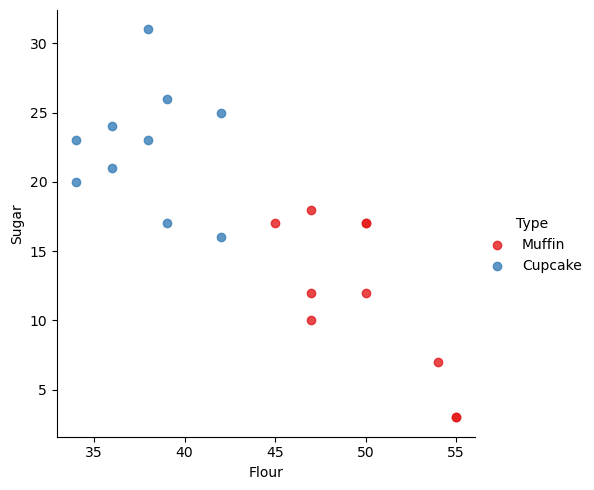

In [7]:
sns.lmplot(x='Flour',y='Sugar',data=recipes,fit_reg=False,hue='Type',palette='Set1')

In [8]:
recipes.columns.values[1:]

array(['Flour', 'Milk', 'Sugar', 'Butter', 'Egg', 'Baking Powder',
       'Vanilla', 'Salt'], dtype=object)

In [9]:
#format and pre-process our data
type_label=np.where(recipes['Type']=="Muffin",0,1)
recipe_features=recipes.columns.values[1:].tolist()
recipe_features
ingredients = recipes[["Flour","Sugar"]].values
print(ingredients)

[[55  3]
 [47 12]
 [47 18]
 [45 17]
 [50 12]
 [55  3]
 [54  7]
 [47 10]
 [50 17]
 [50 17]
 [39 26]
 [42 16]
 [34 20]
 [39 17]
 [38 23]
 [42 25]
 [36 21]
 [38 31]
 [36 24]
 [34 23]]


In [10]:
#fit model
model = svm.SVC(kernel='linear')
model.fit(ingredients,type_label)

SVC(kernel='linear')

In [11]:
#get the separating hyperplane
w=model.coef_[0]
a=-w[0]/w[1]
xx=np.linspace(30,60)
yy=a * xx - (model.intercept_[0]) / w[1]
#plot the parallels to the separating hyperplane
b = model.support_vectors_[0]
yy_down = a * xx + (b[1]-a*b[0])
b = model.support_vectors_[-1]
yy_up = a * xx + (b[1]-a*b[0])

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


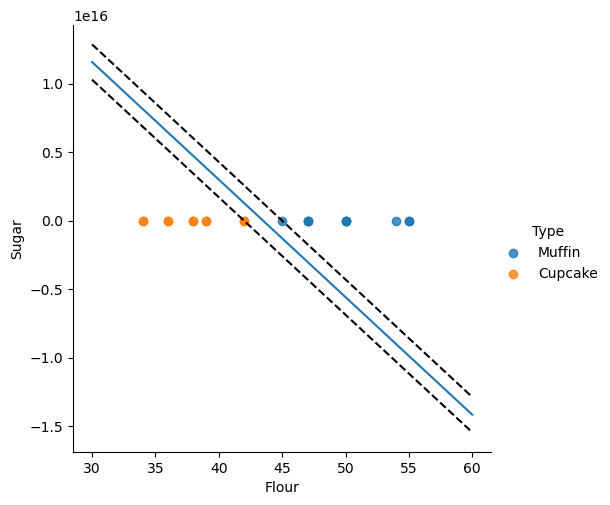

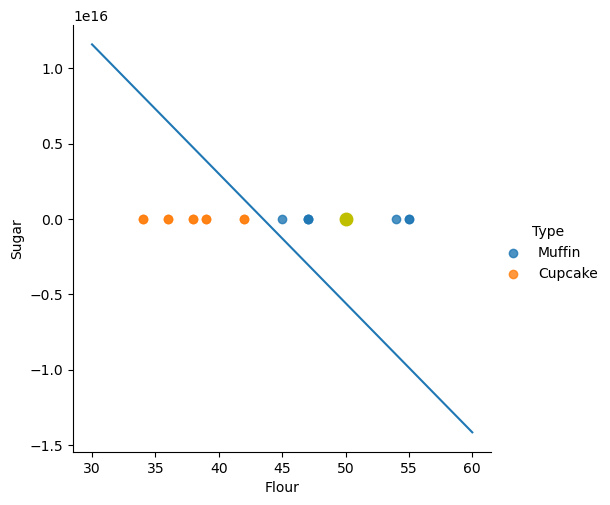

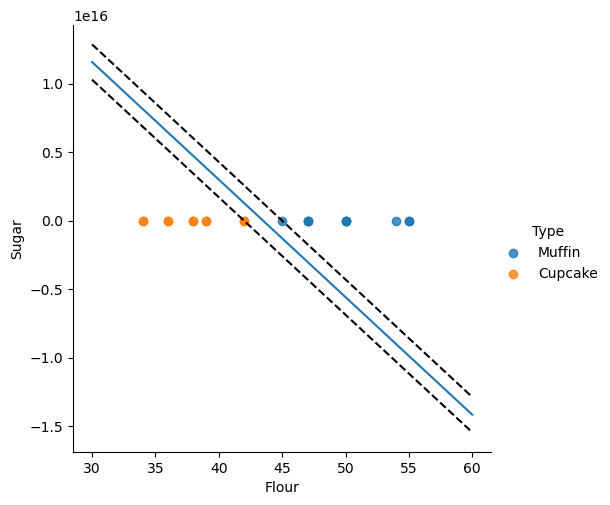

In [16]:
sns.lmplot('Flour','Sugar',recipes,hue='Type',fit_reg=False)
plt.plot(xx,yy)
plt.plot(xx,yy_down,'k--')
plt.plot(xx,yy_up,'k--')
plt.show()

In [13]:
#create a function to predict muffin or cupcake
def muffin_or_cupcake(flour, sugar):
    if(model.predict([[flour, sugar]])==0):
        print("You're looking at a muffin recipe")
    else:
        print("You're looking at a cupcake recipe")
        
#predict
muffin_or_cupcake(50, 20)

You're looking at a muffin recipe


In [14]:
sns.lmplot(x='Flour',y='Sugar',data=recipes,hue='Type',fit_reg=False)
plt.plot(xx,yy)
plt.plot(50,20,'yo',markersize='9')

In [15]:
np.arange(10,20)

array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19])